In [ ]:
import numpy as np
import os
import random
import scipy
from scipy import signal
from numpy.fft import fft
from sklearn.metrics import confusion_matrix

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.initializers import he_normal

from sklearn.model_selection import train_test_split

import pandas as pd
import dask.dataframe as ddf
import dask.multiprocessing
from multiprocessing import Pool
import multiprocessing as multi

import seaborn as sns
sns.set(font='Yu Gothic')
import matplotlib.pyplot as plt
%matplotlib inline

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

from read_csv import wrapper

In [ ]:
columns = ['Label', 'Acc_x', 'Acc_y', 'Acc_z', 'Glo_Acc_x', 'Glo_Acc_y',
       'Glo_Acc_z', 'Gra_x', 'Gra_y', 'Gra_z', 'Gyr_x', 'Gyr_y', 'Gyr_z',
       'LAcc_x', 'LAcc_y', 'LAcc_z', 'Mag_x', 'Mag_y', 'Mag_z', 'Ori_w',
       'Ori_x', 'Ori_y', 'Ori_z', 'Pressure']

columns = dict(zip(columns, [tmp for tmp in range(len(columns))]))

columns

In [ ]:
def load_train_data(hold_position, rates=0.1):
    file_path = "../Data/test/"
    csv_files = os.listdir(file_path)
    csv_files = [tmp for tmp in csv_files if ".csv" in tmp]
    p = Pool(multi.cpu_count())
    args = [[hold_position, csv_file] for csv_file in csv_files[:int(len(csv_files) * rates)]]
    arr = p.map(wrapper, args)
    return np.array(arr)

In [ ]:
%%time
# Bag = load_train_data("Bag", rates=1.0)
# Hips = load_train_data("Hips", rates=1.0)
# Torso = load_train_data("Torso", rates=1.0)
# Hand = load_train_data("Hand", rates=1.0)
Test = load_train_data("", rates=1.0)

In [ ]:
import sys
str(sys.getsizeof(Test) / 1000000000) + "GB"

In [ ]:
%%time
import pickle
# pickle.dump(Bag, open("validation_Bag.binaryfile", 'wb'), protocol=pickle.HIGHEST_PROTOCOL)
# pickle.dump(Hips, open("validation_Hips.binaryfile", 'wb'), protocol=pickle.HIGHEST_PROTOCOL)
# pickle.dump(Torso, open("validation_Torso.binaryfile", 'wb'), protocol=pickle.HIGHEST_PROTOCOL)
# pickle.dump(Hand, open("validation_Hand.binaryfile", 'wb'), protocol=pickle.HIGHEST_PROTOCOL)
pickle.dump(Test, open("Test.binaryfile", 'wb'), protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
def Acc_plot(index, count=10):
#     count = 300
    tt = np.linspace(0, count * 5, count * 500)
    plt.figure(figsize=(24, 8))
    bag = Bag[0]
    hips = Hips[0]
    torso = Torso[0]

    for i in range(1, count):
        bag = np.vstack((bag, Bag[i]))
        hips = np.vstack((hips, Hips[i]))
        torso = np.vstack((torso, Torso[i]))
    print(bag.shape)
    plt.plot(tt, bag[:, index], color='blue')
    plt.plot(tt, hips[:, index], color='red')
    plt.plot(tt, torso[:, index], color='green')
    plt.xlabel("second", fontsize=18)
    plt.ylabel("m/s^2", fontsize=18)
    plt.show()

## Acc_x

In [ ]:
Acc_plot(1, 300)

# tt = np.linspace(0, 5000, 500)
# plt.figure(figsize=(24, 32))
# plt.subplots_adjust(wspace=0.4, hspace=0.6)
# count = 10
# for i in range(count):
#     plt.subplot(count, 1, i+1)
#     plt.plot(tt, Bag[i, :, 1], color='blue')
#     plt.plot(tt,Hips[i, :, 1], color='red')
#     plt.plot(tt, Torso[i, :, 1], color='green')
#     plt.xlabel("ms", fontsize=18)
#     plt.ylabel("m/s^2", fontsize=18)
# plt.show()

## Acc_y

In [ ]:
Acc_plot(2, 300)

# tt = np.linspace(0, 5000, 500)
# plt.figure(figsize=(24, 32))
# plt.subplots_adjust(wspace=0.4, hspace=0.6)
# count = 10
# for i in range(count):
#     plt.subplot(count, 1, i+1)
#     plt.plot(tt, Bag[i, :, 2], color='blue')
#     plt.plot(tt,Hips[i, :, 2], color='red')
#     plt.plot(tt, Torso[i, :, 2], color='green')
#     plt.xlabel("ms", fontsize=18)
#     plt.ylabel("m/s^2", fontsize=18)
# plt.show()

## Acc_z

In [ ]:
Acc_plot(3, 300)

# tt = np.linspace(0, 5000, 500)
# plt.figure(figsize=(24, 32))
# plt.subplots_adjust(wspace=0.4, hspace=0.6)
# count = 10
# for i in range(count):
#     plt.subplot(count, 1, i+1)
#     plt.plot(tt, Bag[i, :, 3], color='blue')
#     plt.plot(tt,Hips[i, :, 3], color='red')
#     plt.plot(tt, Torso[i, :, 3], color='green')
#     plt.xlabel("ms", fontsize=18)
#     plt.ylabel("m/s^2", fontsize=18)
# plt.show()

## Glo_Acc_x

In [ ]:
Acc_plot(4, 300)

# tt = np.linspace(0, 5000, 500)
# plt.figure(figsize=(24, 32))
# plt.subplots_adjust(wspace=0.4, hspace=0.6)
# count = 10
# for i in range(count):
#     plt.subplot(count, 1, i+1)
#     plt.plot(tt, Bag[i, :, 4], color='blue')
#     plt.plot(tt,Hips[i, :, 4], color='red')
#     plt.plot(tt, Torso[i, :, 4], color='green')
#     plt.xlabel("ms", fontsize=18)
#     plt.ylabel("m/s^2", fontsize=18)
# plt.show()

## Glo_Acc_y

In [ ]:
Acc_plot(5, 300)

# tt = np.linspace(0, 5000, 500)
# plt.figure(figsize=(24, 32))
# plt.subplots_adjust(wspace=0.4, hspace=0.6)
# count = 10
# for i in range(count):
#     plt.subplot(count, 1, i+1)
#     plt.plot(tt, Bag[i, :, 5], color='blue')
#     plt.plot(tt,Hips[i, :, 5], color='red')
#     plt.plot(tt, Torso[i, :, 5], color='green')
#     plt.xlabel("ms", fontsize=18)
#     plt.ylabel("m/s^2", fontsize=18)
# plt.show()

## Glo_Acc_z

In [ ]:
Acc_plot(6, 300)

# tt = np.linspace(0, 5000, 500)
# plt.figure(figsize=(24, 32))
# plt.subplots_adjust(wspace=0.4, hspace=0.6)
# count = 10
# for i in range(count):
#     plt.subplot(count, 1, i+1)
#     plt.plot(tt, Bag[i, :, 6], color='blue')
#     plt.plot(tt,Hips[i, :, 6], color='red')
#     plt.plot(tt, Torso[i, :, 6], color='green')
#     plt.xlabel("ms", fontsize=18)
#     plt.ylabel("m/s^2", fontsize=18)
# plt.show()

In [1]:
import numpy as np

import seaborn as sns
sns.set(font='Yu Gothic')
import matplotlib.pyplot as plt
%matplotlib inline

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [2]:
train_Label = np.load("../Data/センサ別npyファイル/train/train_Bag/train_Bag_Label.npy")[:, 0].reshape([-1, 1])
train_Label.shape

(195491, 1)

In [5]:
labels = []
for i in range(8):
    labels.append(np.sum(train_Label[:, 0] == (i+1)))

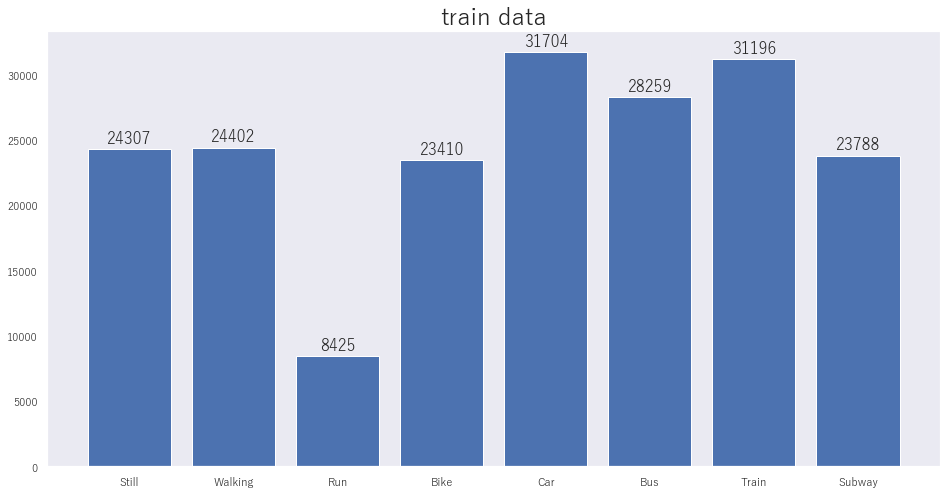

In [19]:
class_names = ["Still", "Walking", "Run", "Bike", "Car", "Bus", "Train", "Subway"]

fig, ax = plt.subplots(figsize=(16, 8))
rect = plt.bar(class_names, np.array(labels))
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                   xy=(rect.get_x() + rect.get_width() / 2, height),
                   xytext=(0, 3),
                   textcoords="offset points",
                   ha='center', va='bottom', fontsize=16)
autolabel(rect)
plt.grid(False)
plt.title("train data", fontsize=24)
plt.show()

In [23]:
rates = []

for i in range(8):
    rates.append(1 / (labels[i] / labels[4]))

rates

[1.304315629242605,
 1.299237767396115,
 3.763086053412463,
 1.3542930371636053,
 1.0,
 1.1219080646873563,
 1.0162841389921784,
 1.3327728266352783]

In [24]:
validation_Label = np.load("../Data/センサ別npyファイル/validation/validation_Bag/validation_Bag_Label.npy")[:, 0].reshape([-1, 1])
validation_Label.shape

(28685, 1)

In [25]:
labels = []
for i in range(8):
    labels.append(np.sum(validation_Label[:, 0] == (i+1)))

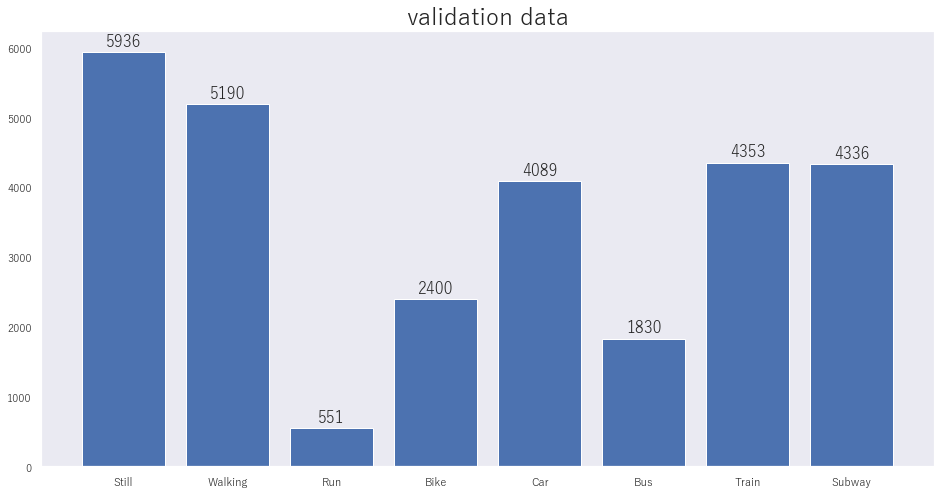

In [27]:
class_names = ["Still", "Walking", "Run", "Bike", "Car", "Bus", "Train", "Subway"]

fig, ax = plt.subplots(figsize=(16, 8))
rect = plt.bar(class_names, np.array(labels))
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                   xy=(rect.get_x() + rect.get_width() / 2, height),
                   xytext=(0, 3),
                   textcoords="offset points",
                   ha='center', va='bottom', fontsize=16)
autolabel(rect)
plt.grid(False)
plt.title("validation data", fontsize=24)
plt.show()